### Pruebas de las librerias

In [1]:
import os, math, emerge_classes
from dynamixel_sdk import *                    # Uses Dynamixel SDK library
from joint_handler import *
from zmqRemoteApi import RemoteAPIClient

from random import randint as ri
from random import uniform as ru

In [2]:
isSim = False
if isSim:
    cluster = False
    setup = Sim_setup(cluster)
    client = RemoteAPIClient('localhost', setup.port_conection)
    sim = client.getObject('sim')
    jointHandler = JointHandler(isSim, client, sim)
else:
    setup = EMERGE_setup()
    portHandler = PortHandler(setup.DEVICENAME)
    packetHandler = PacketHandler(setup.PROTOCOL_VERSION)
    jointHandler = JointHandler(isSim, portHandler, packetHandler)

### Pruebas para robot

In [2]:
isSim = False

In [3]:
if isSim:
    cluster = False
    setup = Sim_setup(cluster)
    client = RemoteAPIClient('localhost', setup.port_conection)
    sim = client.getObject('sim')
    jointHandler = JointHandler(isSim, client, sim)
else:
    setup = EMERGE_setup()
    portHandler = PortHandler(setup.DEVICENAME)
    packetHandler = PacketHandler(setup.PROTOCOL_VERSION)
    jointHandler = JointHandler(isSim, portHandler, packetHandler)

In [4]:
jointHandler.connectEMERGE()

Succeeded to open the port
Succeeded to change the baudrate


In [6]:
jointHandler.enableJointMovement(1)

In [7]:
jointHandler.getJointStatus(1)
jointHandler.getJointStatus(2)

[ID:001] ping Succeeded.


False

In [ ]:
jointHandler.num_joints,jointHandler.max_num_joint

In [ ]:
jointHandler.joint_ids = []
jointHandler.num_joints = 0

In [6]:
jointHandler.getJointList()

[ID:001] ping Succeeded.
[ID:012] ping Succeeded.


In [7]:
print(f"Hay {jointHandler.num_joints} y son {jointHandler.joint_ids}")

Hay 2 y son [1, 12]


In [13]:
jointHandler.disconnectEMERGE()

In [6]:
jointHandler.connectEMERGE()
jointHandler.loadEMERGE()

Succeeded to open the port
Succeeded to change the baudrate
Succeeded to open the port
Succeeded to change the baudrate
[ID:001] ping Succeeded.
[ID:012] ping Succeeded.


In [17]:
jointHandler.num_joints,jointHandler.joint_ids

(2, [1, 12])

In [10]:
jointHandler.exact_rad

0.017453292519943295

In [7]:
jointHandler.setJointTargetVelocity(1,100)

In [9]:
test_pos = [-math.pi/4,0,math.pi/4,0]
for pos in test_pos:
    jointHandler.setJointTargetPosition(1,pos)
    error = abs(pos - jointHandler.getJointPosition(1))
    print(f"Error: {error*189/math.pi}")

Error: 0.7998046874999996
Error: 0.9228515624999902
Error: 0.7998046874999861
Error: 0.9228515625000169


In [ ]:
jointHandler.joint_ids = []
jointHandler.getJointList()

In [ ]:
jointHandler.joint_ids

In [7]:
jointHandler.unloadEMERGE()

### Prueba de casi todas las funciones para robot

In [3]:
jointHandler.loadEMERGE()

Succeeded to open the port
Succeeded to change the baudrate
[ID:012] ping Succeeded.


In [4]:
jointHandler.unloadEMERGE()

AttributeError: 'NoneType' object has no attribute 'close'

In [55]:
jointHandler.joint_ids

[1, 12]

In [4]:
j = 1
position = math.pi/8
jointHandler.setJointTargetPosition(1,position)

Velocidad 123, Progress: 0.0%
Velocidad 123, Progress: 0.0%
Velocidad 123, Progress: 0.0%
Velocidad 123, Progress: 0.0%
Velocidad 123, Progress: 0.0%
Velocidad 123, Progress: 0.0%
Velocidad 123, Progress: 0.0%
Velocidad 123, Progress: 0.0%
Velocidad 129, Progress: 0.0128534704370179%
Velocidad 129, Progress: 0.0128534704370179%
Velocidad 134, Progress: 0.02570694087403569%
Velocidad 134, Progress: 0.02570694087403569%
Velocidad 140, Progress: 0.03856041131105359%
Velocidad 146, Progress: 0.0514138817480726%
Velocidad 146, Progress: 0.0514138817480726%
Velocidad 151, Progress: 0.06426735218509039%
Velocidad 163, Progress: 0.08997429305912619%
Velocidad 169, Progress: 0.10282776349614398%
Velocidad 174, Progress: 0.11568123393316188%
Velocidad 180, Progress: 0.12853470437017966%
Velocidad 186, Progress: 0.14138817480719756%
Velocidad 197, Progress: 0.16709511568123436%
Velocidad 208, Progress: 0.19280205655527016%
Velocidad 214, Progress: 0.20565552699228795%
Velocidad 226, Progress: 0.2

In [65]:
def setJointTargetPosition1(joint, target_position_rad):
    joint_max_velocity = 300
    joint_min_velocity = 100

    jointHandler.setJointTargetVelocity(joint,jointHandler.joint_min_velocity)
    jointHandler.setJointAngularPosition(joint, target_position_rad)

    act_pos = jointHandler.getJointPosition(joint)
    counter = 0
    diff = act_pos - target_position_rad
    error = abs(diff)

    while abs(error) > jointHandler.exact_rad or counter < 5:

        dist_percent = abs(error/diff)
        k = math.log(joint_max_velocity/joint_min_velocity)
        offset = joint_min_velocity
        velocity = round(offset * math.exp(k * dist_percent))
        
        print(f"Velocidad {velocity}, Dist: {dist_percent}%")
        
        jointHandler.setJointTargetVelocity(joint,velocity)
        jointHandler.setJointAngularPosition(joint, target_position_rad)
        
        new_pos = jointHandler.getJointPosition(joint)

        if round(act_pos, 3) == round(new_pos, 3):
            counter += 1
        else:
            counter = counter
    
        act_pos = new_pos
        error = new_pos - target_position_rad

In [4]:
jointHandler.joint_ids

[1, 12]

In [17]:
jointHandler.setJointInitialPosition(12)

In [21]:
jointHandler.setJointTargetPosition(12,math.pi/2)

In [5]:
print(jointHandler.joint_max_velocity,jointHandler.joint_min_velocity)


256 123


In [8]:
jointHandler.setJointTargetPosition(12,-3*math.pi/32)

In [15]:
jointHandler.setJointAngularPosition(12,-math.pi/2)

In [ ]:
test_pos = [-math.pi/4,0,math.pi/4,0]
pos = 0
incr = 7.5*math.pi/180
i = 0
for i in range(5):
    post = post + incr
    jointHandler.setJointTargetPosition(12,post)

In [ ]:
for joint in jointHandler.joint_ids:
    jointHandler.setJointTargetPosition(joint,0)

In [9]:
test_pos = [-math.pi/4,0,math.pi/4,0]
for joint in jointHandler.joint_ids:
    for pos in test_pos:
        jointHandler.setJointTargetPosition(joint,pos)

Velocidad 200, Dist: 1.0%
Velocidad 200, Dist: 1.0%
Velocidad 200, Dist: 1.0%
Velocidad 200, Dist: 1.0%
Velocidad 200, Dist: 1.0%
Velocidad 200, Dist: 1.0%
Velocidad 200, Dist: 1.0%
Velocidad 199, Dist: 0.9956634865568084%
Velocidad 199, Dist: 0.9913269731136164%
Velocidad 199, Dist: 0.9913269731136164%
Velocidad 198, Dist: 0.9869904596704248%
Velocidad 197, Dist: 0.9783174327840415%
Velocidad 196, Dist: 0.9739809193408498%
Velocidad 196, Dist: 0.9696444058976582%
Velocidad 195, Dist: 0.9653078924544666%
Velocidad 195, Dist: 0.9609713790112749%
Velocidad 193, Dist: 0.9522983521248913%
Velocidad 192, Dist: 0.9436253252385081%
Velocidad 191, Dist: 0.9349522983521248%
Velocidad 191, Dist: 0.9306157849089333%
Velocidad 188, Dist: 0.9132697311361664%
Velocidad 187, Dist: 0.9045967042497831%
Velocidad 187, Dist: 0.9002601908065915%
Velocidad 186, Dist: 0.8915871639202082%
Velocidad 184, Dist: 0.8829141370338246%
Velocidad 183, Dist: 0.8742411101474413%
Velocidad 182, Dist: 0.865568083261058%

In [4]:
jointHandler.unloadEMERGE()

#### Funcion para regular le velocidad en funcion de la distancia con el objetivo 

In [32]:
def funcion_exponencial(x, valor_minimo, valor_maximo):
    k = math.log(valor_maximo / valor_minimo)
    # k = math.log(3)
    return valor_minimo* math.exp(k * x)

# Ejemplo de uso:
x_0 = 0
x_1 = 1
valor_minimo = 200
valor_maximo = 600

resultado_0 = funcion_exponencial(x_0, valor_minimo, valor_maximo)
resultado_1 = funcion_exponencial(x_1, valor_minimo, valor_maximo)

print(f"f({x_0}) = {resultado_0}")
print(f"f({x_1}) = {resultado_1}")

f(0) = 200.0
f(1) = 600.0000000000001


In [37]:
import numpy as np
import matplotlib.pyplot as plt
valor_minimo = 200
valor_maximo = 600

x = np.arange(0, 11, 0.1).tolist()
y = [funcion_exponencial(i, valor_minimo, valor_maximo) for i in x]

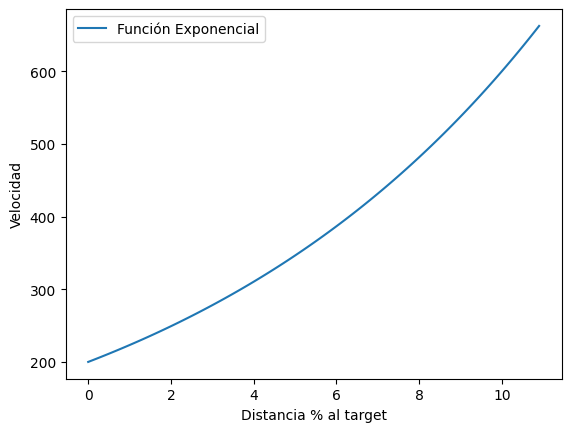

In [38]:
plt.figure()
plt.plot(x,y, label='Función Exponencial')
plt.xlabel('Distancia % al target')
plt.ylabel('Velocidad')
plt.legend()
plt.show()

#### Funcion trapezoidal

f(0) = 200
f(0.3) = 600
f(0.7) = 600
f(1) = 200


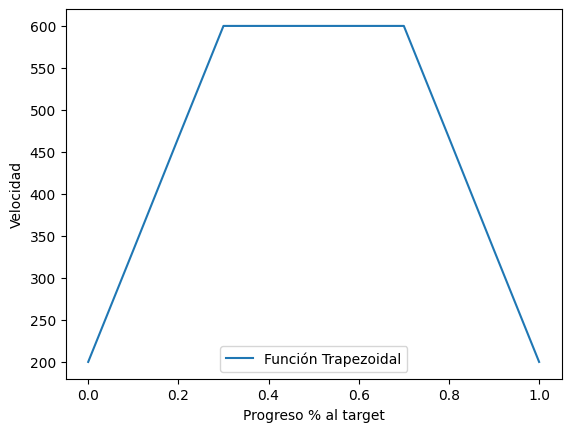

In [18]:
def funcion_trapezoidal(progress, valor_minimo, valor_maximo):
    p1 = 0.3
    p2 = 0.7
    p3 = 1
    # Remaining percentage to goal
    if progress <= p1:
        x = progress
        m = (valor_maximo-valor_minimo)/p1
        b = valor_minimo
        velocity = x * m + b
    elif p1 < progress and progress < p2:
        velocity = valor_maximo
    else:
        x = progress
        m = (valor_minimo-valor_maximo)/(p3-p2)
        b = valor_minimo - p3* m
        velocity = x * m + b
    return round(velocity)

# Ejemplo de uso:
x_0 = 0
x_1 = 0.3
x_2 = 0.7
x_3 = 1
valor_minimo = 200
valor_maximo = 600

resultado_0 = funcion_trapezoidal(x_0, valor_minimo, valor_maximo)
resultado_1 = funcion_trapezoidal(x_1, valor_minimo, valor_maximo)
resultado_2 = funcion_trapezoidal(x_2, valor_minimo, valor_maximo)
resultado_3 = funcion_trapezoidal(x_3, valor_minimo, valor_maximo)

print(f"f({x_0}) = {resultado_0}")
print(f"f({x_1}) = {resultado_1}")
print(f"f({x_2}) = {resultado_2}")
print(f"f({x_3}) = {resultado_3}")

import numpy as np
import matplotlib.pyplot as plt
valor_minimo = 200
valor_maximo = 600

x = np.arange(0, 1.1, 0.1).tolist()
y = [funcion_trapezoidal(i, valor_minimo, valor_maximo) for i in x]

plt.figure()
plt.plot(x,y, label='Función Trapezoidal')
plt.xlabel('Progreso % al target')
plt.ylabel('Velocidad')
plt.legend()
plt.show()

In [30]:
jointHandler.getJointPosition(joint)

0.0

In [71]:
def funcion_trapezoidal2(progress, valor_minimo, valor_maximo):
    p1 = 0.3
    p2 = 0.7
    p3 = 1
    # Remaining percentage to goal
    if progress <= p1:
        x = progress
        m = (valor_maximo-valor_minimo)/p1
        b = valor_minimo
        velocity = x * m + b
    elif p1 < progress and progress < p2:
        x = progress
        m = ((4/5*valor_maximo)-valor_maximo)/(p2-p1)
        b = valor_maximo - p1* m
        velocity = x * m + b
    else:
        x = progress
        m = (valor_minimo-(4/5*valor_maximo))/(p3-p2)
        b = valor_minimo - p3* m
        velocity = x * m + b
    return round(velocity)

In [36]:
pi = math.pi
-pi

-3.141592653589793

In [4]:
mov = []

In [5]:
joint = 12
pos = jointHandler.getJointPosition(joint)
print(pos)
if round(pos) > 0:
    target_position_rad = 0
elif pos == 0:
    target_position_rad = math.pi/2
elif pos < 0:
    target_position_rad = -math.pi/2
print(target_position_rad)

-0.005113269292952083
-1.5707963267948966


In [74]:
jointHandler.joint_min_velocity = 100
jointHandler.joint_max_velocity = 200

In [34]:
increment = 7.5*math.pi/180
target_position_rad = jointHandler.getJointPosition(joint) + 0.8*increment

In [26]:
target_position_rad = 0

In [35]:
vel = []
prog = []
exe = {}


jointHandler.setJointTargetVelocity(joint,jointHandler.joint_min_velocity)
jointHandler.setJointAngularPosition(joint, target_position_rad)

act_pos = jointHandler.getJointPosition(joint)
counter = 0
diff = act_pos - target_position_rad
exe["distancia"] = diff
error = abs(diff)

while abs(error) > jointHandler.exact_rad or counter < 5:

    # Adjusts velocity of the motion proportionally to the distance to the target position
    if abs(diff) > increment:
        dist_percent = abs(error/diff)
        progress = 1 - dist_percent
        prog.append(progress)
        velocity = funcion_trapezoidal(progress, jointHandler.joint_min_velocity, jointHandler.joint_max_velocity)
    else:
        velocity = jointHandler.joint_min_velocity
    vel.append(velocity)
    print(f"Velocidad {velocity}, Diff: {abs(diff)}%")

    jointHandler.setJointTargetVelocity(joint,velocity)
    jointHandler.setJointAngularPosition(joint, target_position_rad)
    
    new_pos = jointHandler.getJointPosition(joint)

    if round(act_pos, 3) == round(new_pos, 3):
        counter += 1
    else:
        counter = counter

    act_pos = new_pos
    error = new_pos - target_position_rad
exe["velocidad"] = vel
exe["progreso"] = prog
mov.append(exe)

Velocidad 123, Diff: 0.10983302441261189%
Velocidad 123, Diff: 0.10983302441261189%
Velocidad 123, Diff: 0.10983302441261189%
Velocidad 123, Diff: 0.10983302441261189%
Velocidad 123, Diff: 0.10983302441261189%
Velocidad 123, Diff: 0.10983302441261189%
Velocidad 123, Diff: 0.10983302441261189%
Velocidad 123, Diff: 0.10983302441261189%
Velocidad 123, Diff: 0.10983302441261189%
Velocidad 123, Diff: 0.10983302441261189%
Velocidad 123, Diff: 0.10983302441261189%
Velocidad 123, Diff: 0.10983302441261189%
Velocidad 123, Diff: 0.10983302441261189%
Velocidad 123, Diff: 0.10983302441261189%
Velocidad 123, Diff: 0.10983302441261189%
Velocidad 123, Diff: 0.10983302441261189%
Velocidad 123, Diff: 0.10983302441261189%
Velocidad 123, Diff: 0.10983302441261189%
Velocidad 123, Diff: 0.10983302441261189%
Velocidad 123, Diff: 0.10983302441261189%
Velocidad 123, Diff: 0.10983302441261189%
Velocidad 123, Diff: 0.10983302441261189%
Velocidad 123, Diff: 0.10983302441261189%
Velocidad 123, Diff: 0.10983302441

In [ ]:
plt.figure()
plt.plot(prog,vel, label='Función Trapezoidal')
plt.xlabel('Progreso % al target')
plt.ylabel('Velocidad')
plt.legend()
plt.show()

In [ ]:
for run in mov[6:]:
    plt.figure()
    plt.title(run["distancia"]*180/math.pi)
    plt.plot(run["progreso"],run["velocidad"], label='Función Trapezoidal')
    plt.xlabel('Progreso % al target')
    plt.ylabel('Velocidad')
    plt.legend()
    plt.show()

ValueError: x and y must have same first dimension, but have shapes (0,) and (25,)

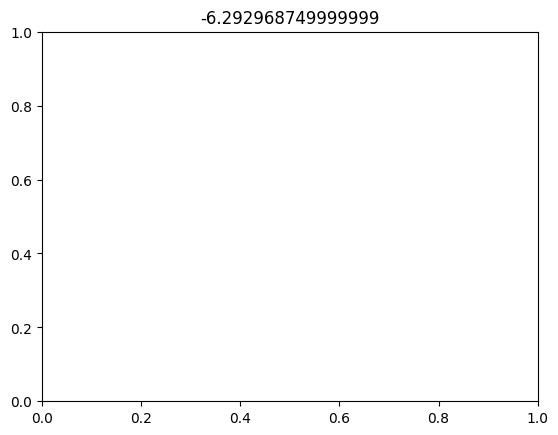

In [36]:
run = mov[-1]
plt.figure()
plt.title(run["distancia"]*180/math.pi)
plt.plot(run["progreso"],run["velocidad"], label='Función Trapezoidal')
plt.xlabel('Progreso % al target')
plt.ylabel('Velocidad')
plt.legend()
plt.show()

### Pruebas para simulacion

In [3]:
isSim = True
if isSim:
    cluster = False
    setup = Sim_setup(cluster)
    client = RemoteAPIClient('localhost', setup.port_conection)
    sim = client.getObject('sim')
    jointHandler = JointHandler(isSim, client, sim)
else:
    setup = EMERGE_setup()
    portHandler = PortHandler(setup.DEVICENAME)
    packetHandler = PacketHandler(setup.PROTOCOL_VERSION)
    jointHandler = JointHandler(isSim, portHandler, packetHandler)

In [4]:
jointHandler.loadEMERGE()

In [6]:
print(jointHandler.__dict__)

{'client': <zmqRemoteApi.RemoteAPIClient object at 0x000001144FF6B6D0>, 'sim': <class 'zmqRemoteApi.sim'>, 'exact_rad': 0.017453292519943295, 'joint_ids': [18, 22, 26], 'num_joints': 3, 'obj_ids': [28]}


In [10]:
initial_pos = [-math.pi/4, math.pi/4, -math.pi/4]
#Set all the joints to their initial position
for joint_n in range(jointHandler.num_joints):
    init_pos = initial_pos[joint_n]
    joint = jointHandler.joint_ids[joint_n]

    jointHandler.setJointInitialPosition(joint,init_pos)
    print(jointHandler.getJointPosition(joint))


TypeError: JointHandlerEMERGE.setJointTargetPosition() takes 3 positional arguments but 4 were given

In [ ]:
for joint_n in range(jointHandler.num_joints):
    init_pos = initial_pos[joint_n]
    joint = jointHandler.joint_ids[joint_n]

    jointHandler.setJointInitialPosition(joint,init_pos)
    print(jointHandler.getJointPosition(joint))

In [12]:
#Generate a list for random starting positions
def set_starting_position ():
    starting_pos = []
    starting_angles = [0, 45, 75]
    angle = ri(0, len(starting_angles)-1)
    sentido = math.pow(-1,ri(0, 1))
    for _ in jointHandler.joint_ids:
        starting_pos.append(sentido*starting_angles[angle]*math.pi/180)
    return starting_pos


def init_position():
    initial_pos = set_starting_position()
    #Set all the joints to their initial position
    for joint_n in range(jointHandler.num_joints):
        init_pos = initial_pos[joint_n]
        joint = jointHandler.joint_ids[joint_n]

        jointHandler.setJointInitialPosition(joint,init_pos)
        print(jointHandler.getJointPosition(joint))

In [15]:
init_position()

-0.7853981852531433
-0.7853981852531433
-0.7853981852531433


In [18]:
#Class to store all the perceptions
class perceptions ():
    def __init__(self):
        #Execution data
        self.sequence = 0
        self.step = 0
        self.increments = []
        #Initial perceptions
        self.prev_j_positions = []
        self.prev_pos_x = 0
        self.prev_pos_y = 0
        self.prev_pos_z = 0
        #Resulting perceptions
        self.post_j_positions = []
        self.post_pos_x = 0
        self.post_pos_y = 0
        self.post_pos_z = 0

perception = perceptions()

In [35]:
def rand_gen():
    for num in range(jointHandler.num_joints):
        n = ru(-80, 85) * math.pi / 180
        perception.increments.append(n)

In [16]:
jointHandler.connectEMERGE()

In [38]:
perception = perceptions()
rand_gen()

In [39]:
perception.increments

[0.45237746982119986, -0.8993947895509815, 0.012890266707569173]

In [33]:
init_position()

1.3089969158172607
1.3089969158172607
1.3089969158172607


In [40]:
for joint_n in range(jointHandler.num_joints):
    next_pos = perception.increments[joint_n]
    joint = jointHandler.joint_ids[joint_n]

    jointHandler.setJointTargetPosition(joint,next_pos)
    print(jointHandler.getJointPosition(joint))

0.4470522403717041
-0.9167826175689697
0.004396915435791016


In [41]:
jointHandler.disconnectEMERGE()